In [3]:
#get the data
import requests
import pandas as pd

city_name = input('Enter City Name: ')
# Function to get forecast weather data
def get_forecast_weather():
    
    url = f'http://api.openweathermap.org/data/2.5/forecast?q={city_name}&appid=d1a83b1d1e1ca2f57b49a9824e9998d7&units=metric'
    response = requests.get(url)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code} - {response.text}")
        return None

# Get the forecast data
forecast_data = get_forecast_weather()


if forecast_data:
    # Extract the list of forecast items
    forecast_list = forecast_data['list']
    
    # Create a list to store each data point as a dictionary
    data_to_store = []
    for entry in forecast_list:
        data_point = {
            'DateTime': entry['dt_txt'],
            'Temperature_C': entry['main']['temp'],
            'Feels_Like_C': entry['main']['feels_like'],
            'Weather': entry['weather'][0]['description'],
            'Humidity_P': entry['main']['humidity'],
            'Wind_Speed_m_s': entry['wind']['speed'],
            'City':city_name
        }
        data_to_store.append(data_point)
    
    # Create a DataFrame from the list of data points
    df_forecast = pd.DataFrame(data_to_store)
    
    
    #print(df_forecast)
    #print(forecast_data)
else:
    print("Failed to retrieve forecast data.")

#df_forecast.head()

Enter City Name:  ambala


In [5]:
#df_forecast.describe()
df_forecast.dtypes

DateTime           object
Temperature_C     float64
Feels_Like_C      float64
Weather            object
Humidity_P          int64
Wind_Speed_m_s    float64
City               object
dtype: object

In [7]:
#make the connection and store the data
from sqlalchemy import create_engine
from sqlalchemy.sql import text

# Create the engine
engine = create_engine('mssql+pyodbc://@DESKTOP-AC0JV2J\\SQLEXPRESS/Climate?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes')



df_forecast['DateTime'] = pd.to_datetime(df_forecast['DateTime'])

# Try to store DataFrame in the SQL Server table
try:
    df_forecast.to_sql('WeatherData', con=engine, if_exists='append', index=False)
    print("Data has been successfully stored in the WeatherData table.")
except Exception as e:
    print("An error occurred:", e)



Data has been successfully stored in the WeatherData table.


In [9]:
#writing queries
from sqlalchemy import create_engine
from sqlalchemy.sql import text

# Create the engine
engine = create_engine('mssql+pyodbc://@DESKTOP-AC0JV2J\\SQLEXPRESS/Climate?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes')

# Define the query
query = text("SELECT distinct city FROM WeatherData ") 

# Execute the query
with engine.connect() as connection:
    result = connection.execute(query)
    for row in result:
        print(row)

('ambala',)
('delhi',)
('mumbai',)
('shimla',)


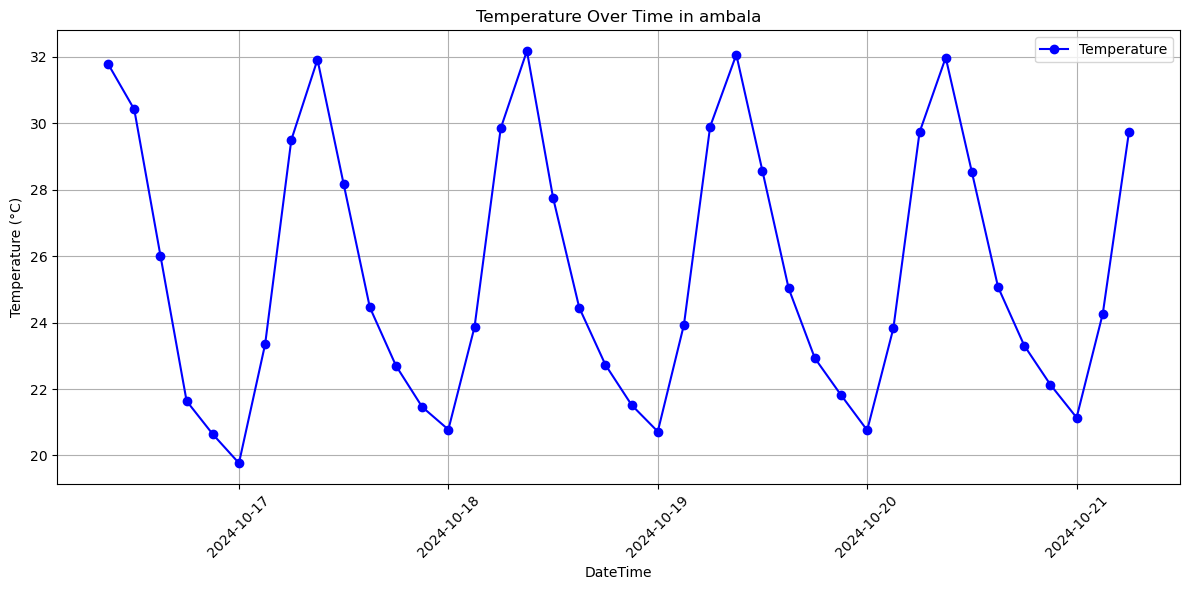

In [13]:
#making charts
import matplotlib.pyplot as plt

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(df_forecast['DateTime'], df_forecast['Temperature_C'], label='Temperature', color='b', marker='o')


plt.xlabel('DateTime')
plt.ylabel('Temperature (°C)')
plt.title(f'Temperature Over Time in {city_name}') 
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
